In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from numpy.random import seed
seed(516)
from tensorflow.random import set_seed
set_seed(516)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving RoadAccident.csv to RoadAccident (1).csv


In [3]:
import io
road = pd.read_csv(io.BytesIO(uploaded['RoadAccident.csv']))
road.head()


,Accident_Index,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,High_Wind,Lights,Datetime,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,1,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,Fine,No,Daylight,1/19/10 17:30,2010,4,1,19,2,0.729,2,7,8,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
1,2,51.499635,-0.209915,London,Urban,A,3,30,Single carriageway,Dry,Fine,No,Daylight,2/8/10 11:24,2010,4,2,8,1,0.475,2,5,2,More than 4 arms (not roundabout),Mid Junction - on roundabout or on main road,Offside,Other/Not known,2987,Heavy oil,Mercedes,Car,Waiting to go,Slight
2,3,51.492515,-0.168130,London,Urban,Unclassified,5,30,Single carriageway,Dry,Fine,No,Daylight,3/3/10 06:25,2010,4,3,3,3,0.267,2,5,11,Crossroads,Mid Junction - on roundabout or on main road,Front,Journey as part of work,998,Petrol,Nissan,Car,Going ahead,Slight
3,4,51.504784,-0.193863,London,Urban,A,2,30,Single carriageway,Dry,Fine,No,Daylight,3/4/10 13:35,2010,4,3,4,4,0.566,2,3,5,T or staggered junction,Mid Junction - on roundabout or on main road,Offside,Journey as part of work,2179,Heavy oil,Citroen,Van,Turning right,Slight
4,5,51.522072,-0.212927,London,Urban,B,3,30,Single carriageway,Wet or damp,Fine,No,Daylight,3/12/10 16:05,2010,4,3,12,5,0.670,1,4,4,T or staggered junction,Approaching junction or waiting/parked at junc...,Nearside,Journey as part of work,2198,Heavy oil,Ford,Van,Overtaking,Slight


In [4]:
road.drop('Accident_Index', axis = 1, inplace = True)
road.head()

,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,High_Wind,Lights,Datetime,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,Fine,No,Daylight,1/19/10 17:30,2010,4,1,19,2,0.729,2,7,8,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
1,51.499635,-0.209915,London,Urban,A,3,30,Single carriageway,Dry,Fine,No,Daylight,2/8/10 11:24,2010,4,2,8,1,0.475,2,5,2,More than 4 arms (not roundabout),Mid Junction - on roundabout or on main road,Offside,Other/Not known,2987,Heavy oil,Mercedes,Car,Waiting to go,Slight
2,51.492515,-0.168130,London,Urban,Unclassified,5,30,Single carriageway,Dry,Fine,No,Daylight,3/3/10 06:25,2010,4,3,3,3,0.267,2,5,11,Crossroads,Mid Junction - on roundabout or on main road,Front,Journey as part of work,998,Petrol,Nissan,Car,Going ahead,Slight
3,51.504784,-0.193863,London,Urban,A,2,30,Single carriageway,Dry,Fine,No,Daylight,3/4/10 13:35,2010,4,3,4,4,0.566,2,3,5,T or staggered junction,Mid Junction - on roundabout or on main road,Offside,Journey as part of work,2179,Heavy oil,Citroen,Van,Turning right,Slight
4,51.522072,-0.212927,London,Urban,B,3,30,Single carriageway,Wet or damp,Fine,No,Daylight,3/12/10 16:05,2010,4,3,12,5,0.670,1,4,4,T or staggered junction,Approaching junction or waiting/parked at junc...,Nearside,Journey as part of work,2198,Heavy oil,Ford,Van,Overtaking,Slight


In [5]:
road = road.apply(preprocessing.LabelEncoder().fit_transform)
road.head()

,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,High_Wind,Lights,Datetime,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,20801,53085,2,1,3,6,1,3,0,0,0,3,1785,0,3,0,18,1,725,1,6,7,2,8,2,2,407,1,0,1,1,1
1,21034,51904,2,1,0,2,1,3,0,0,0,3,27535,0,3,1,7,0,471,1,4,1,1,7,4,2,664,0,10,1,10,1
2,20568,53534,2,1,5,4,1,3,0,0,0,3,32009,0,3,2,2,2,263,1,4,10,0,7,2,1,205,1,12,1,1,1
3,21327,52561,2,1,0,1,1,3,0,0,0,3,32544,0,3,2,3,3,562,1,2,4,7,7,4,1,498,0,2,5,8,1
4,22601,51808,2,1,2,2,1,3,4,0,0,3,28550,0,3,2,11,4,666,0,3,3,7,0,3,1,506,0,4,5,3,1


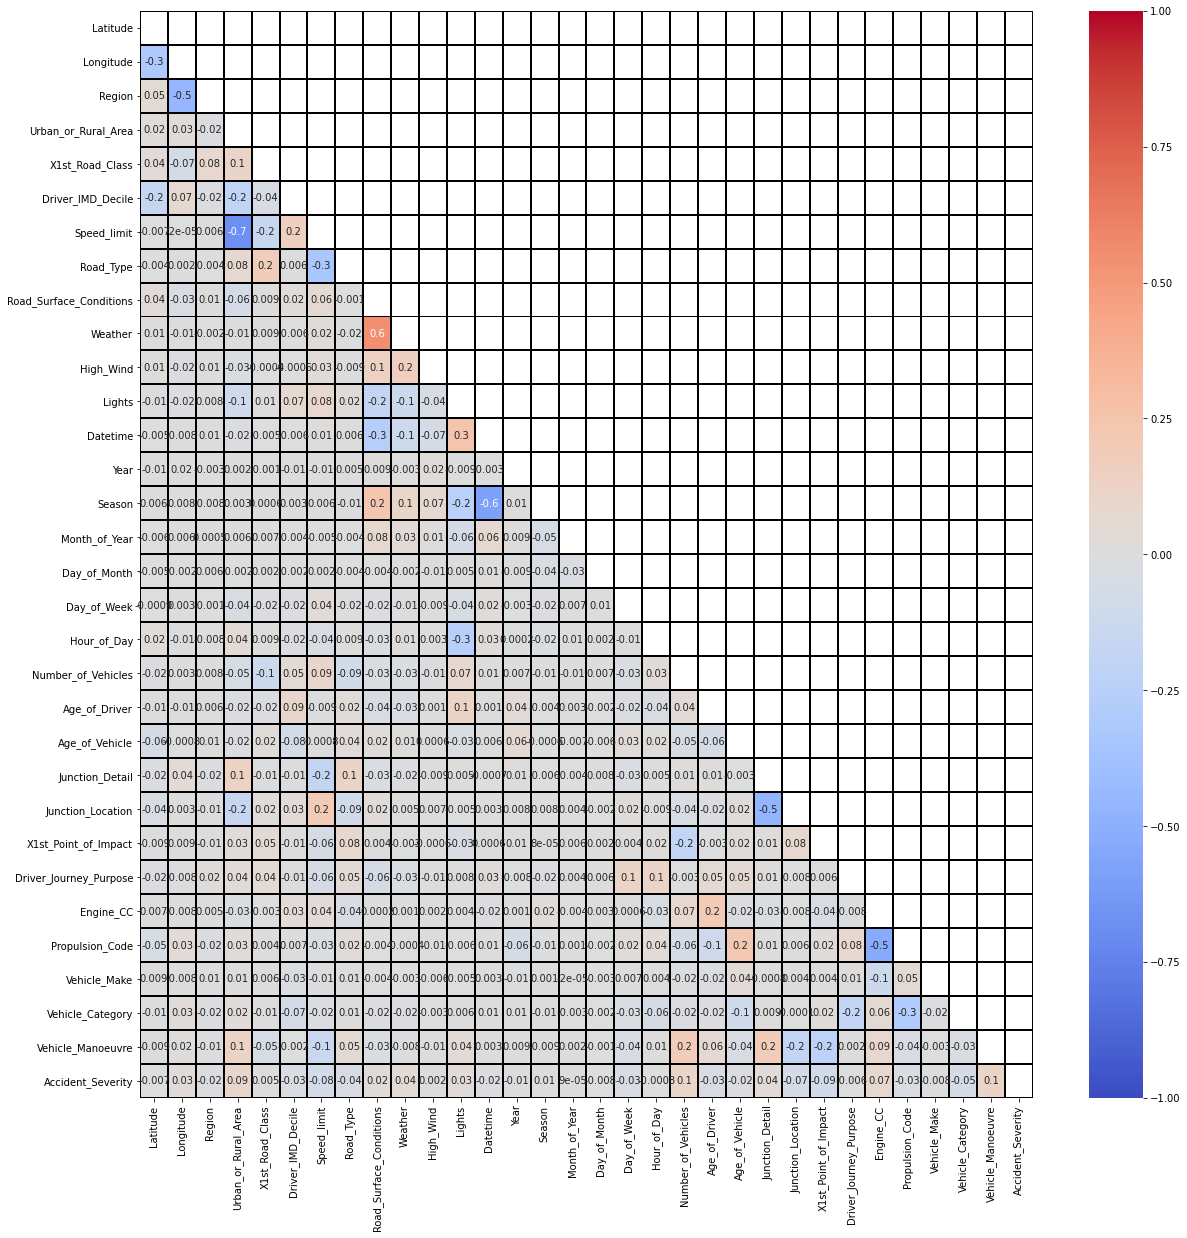

In [6]:
plt.subplots(figsize=(20,20))
matrix = np.triu(road.corr())
sns.heatmap(road.corr(),annot = True, fmt = '.1g',vmin = -1, vmax = 1,linewidths = 1, linecolor = 'black',
            cmap = 'coolwarm',mask = matrix, center = 0)

In [7]:
X = road.drop('Accident_Severity', axis = 1)
y = road['Accident_Severity']

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 516)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size = 0.2, random_state = 516)


In [8]:
# SVM Classifier

svm_clf = Pipeline([
                    ('scalar', StandardScaler()),
                    ('linear_svc', LinearSVC(loss = "hinge", random_state = 516))
                   ])

parameters = {'linear_svc__C':[0.01,0.1,0.5,1,10]}

svc = GridSearchCV(svm_clf, parameters, n_jobs = -1)
svc.fit(X_train_full, y_train_full) 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scalar',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linear_svc',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='hinge', max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=516, tol=0.0001,
                                                  verbose=0))],
                   

In [9]:
svc.best_params_

{'linear_svc__C': 0.01}

In [10]:
# Evaluation on test set
np.mean(svc.predict(X_test) != y_test)

0.24923891462607545

Neural Networks

In [11]:
data_scaler = StandardScaler()
X_train_scaled = data_scaler.fit_transform(X_train)
X_valid_scaled = data_scaler.transform(X_valid)
X_test_scaled = data_scaler.transform(X_test)

In [15]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.random import set_seed

set_seed(516)

# Set up the model
model_cls = Sequential([
                          Dense(100, input_dim = X_train_scaled.shape[1]), Activation('relu'),
                          Dense(50), Activation('relu'),
                          Dense(45), Activation('relu'),
                          Dense(30), Activation('relu'),
                          Dense(1), Activation("softmax")
                       ])
model_cls.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01),
                  loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model_cls.fit(X_train_scaled, y_train, 
                    validation_data = (X_valid_scaled, y_valid),
                    epochs = 15)

Epoch 1/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.7527
Epoch 2/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.7527
Epoch 3/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.7527
Epoch 4/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.7527
Epoch 5/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.7527
Epoch 6/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.7527
Epoch 7/15
1511/1511 [==============================] - 3s 2ms/step - loss: 0.0000e+00 -

In [17]:
# Accuracy on test set
model_cls.evaluate(X_test_scaled, y_test)

473/473 [==============================] - 0s 949us/step - loss: 0.0000e+00 - accuracy: 0.7508


[0.0, 0.750761091709137]

Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

nb_cls = Pipeline([
                      ('clf', GaussianNB())
                    ])

parameters = {'clf__var_smoothing': [1e-07,1e-08,1e-09]}

gauss_cls = GridSearchCV(nb_cls, param_grid = parameters, n_jobs = -1)

gauss_cls.fit(X_train_full, y_train_full)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'clf__var_smoothing': [1e-07, 1e-08, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
gauss_cls.best_params_

{'clf__var_smoothing': 1e-08}

In [21]:
# Evaluation on test set
np.mean(gauss_cls.predict(X_test) != y_test)

0.25400397088021176